<a href="https://colab.research.google.com/github/vanand102/Springboard/blob/main/Capstone3_DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling**

**Obtained this dataset from Kaggle: https://www.kaggle.com/datasets/shivam2503/diamonds?datasetId=1312&sortBy=voteCount**

**Mounted Google Drive and imported folder.**

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import sys
sys.path.append('/content/drive/MyDrive/Springboard/Capstone 3')

**Imported Necessary Libraries**

In [52]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines belo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

In [53]:
# the supplied CSV data file is the raw_data directory
diamond_data = pd.read_csv('/content/drive/MyDrive/Springboard/Capstone 3/diamonds.csv')

**Taking a look at the data.**

In [54]:
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [55]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [56]:
diamond_data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**There's no missing data in the dataset**

In [57]:
missing = pd.concat([diamond_data.isna().sum(), 100 * diamond_data.isna().mean()],axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending=False)

,count,%
Unnamed: 0,0,0.0
carat,0,0.0
cut,0,0.0
color,0,0.0
clarity,0,0.0
depth,0,0.0
table,0,0.0
price,0,0.0
x,0,0.0
y,0,0.0


**Created a bar chart for each categorical feature in order to see the distribution of the data.**

In [58]:
diamond_data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

<Axes: xlabel='cut', ylabel='count'>

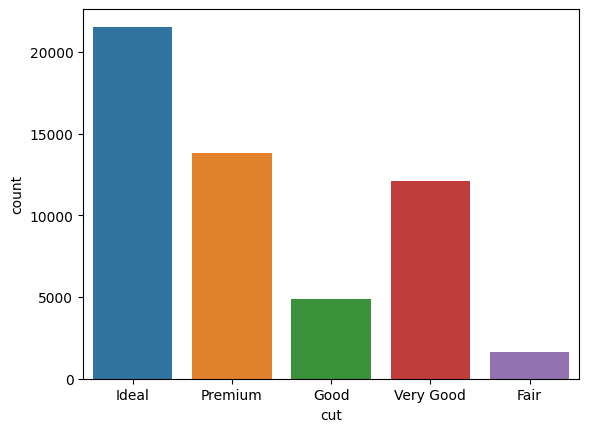

In [59]:
sns.countplot(x=diamond_data['cut'])

In [60]:
diamond_data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<Axes: xlabel='color', ylabel='count'>

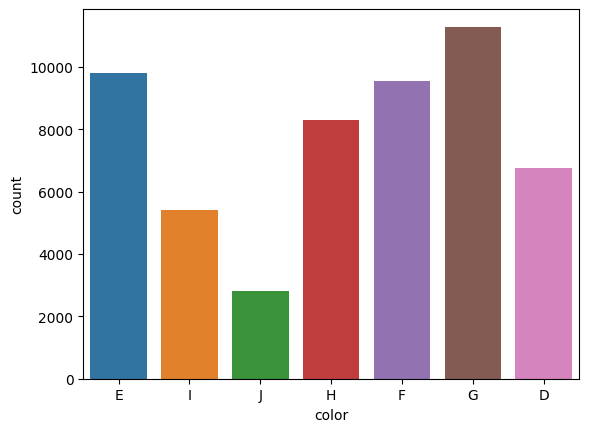

In [61]:
sns.countplot(x=diamond_data['color'])

In [62]:
diamond_data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

<Axes: xlabel='clarity', ylabel='count'>

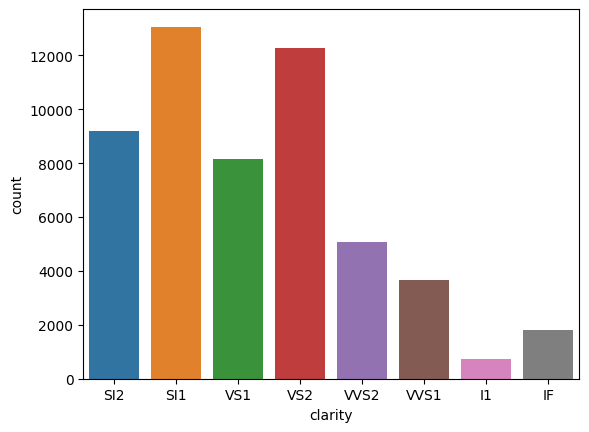

In [63]:
sns.countplot(x=diamond_data['clarity'])

**Created a histogram for each numerical feature in order to see the distribution of the data.**

In [64]:
diamond_data['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

<Axes: xlabel='carat', ylabel='Count'>

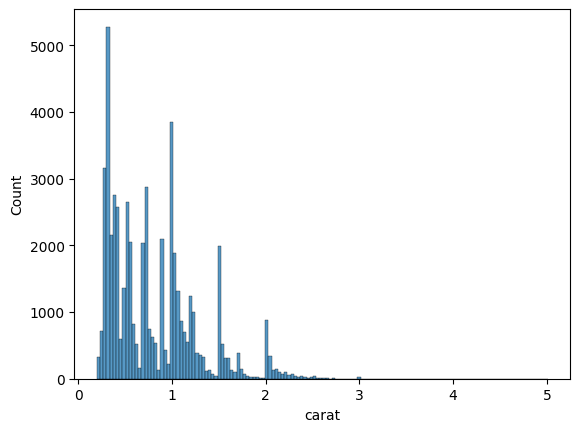

In [65]:
sns.histplot(data=diamond_data, x="carat")

<Axes: >

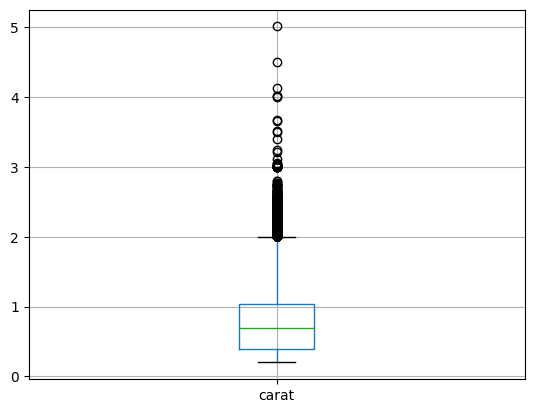

In [66]:
diamond_data.boxplot(column=['carat'])

In [67]:
diamond_data['depth'].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

<Axes: xlabel='depth', ylabel='Count'>

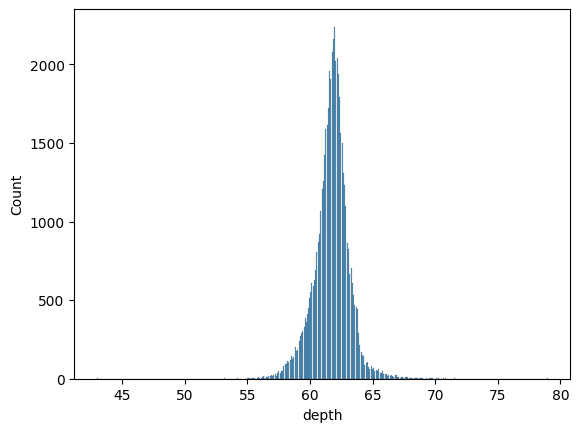

In [68]:
sns.histplot(data=diamond_data, x="depth")

<Axes: >

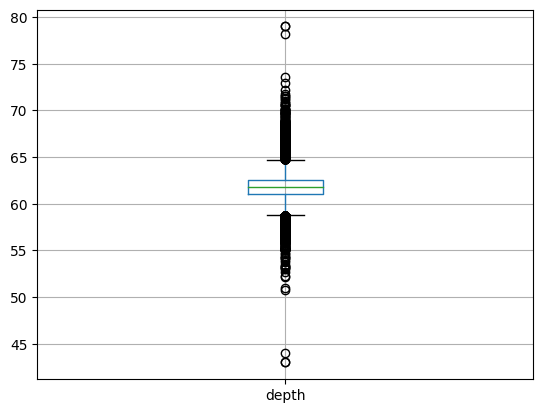

In [69]:
diamond_data.boxplot(column=['depth'])

In [70]:
diamond_data['table'].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

<Axes: xlabel='table', ylabel='Count'>

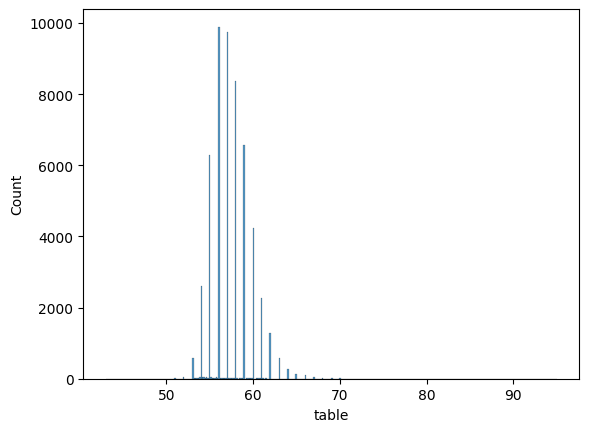

In [71]:
sns.histplot(data=diamond_data, x="table")

<Axes: >

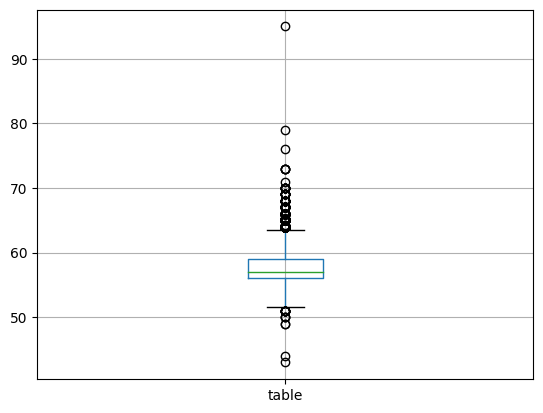

In [72]:
diamond_data.boxplot(column=['table'])

In [73]:
diamond_data['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

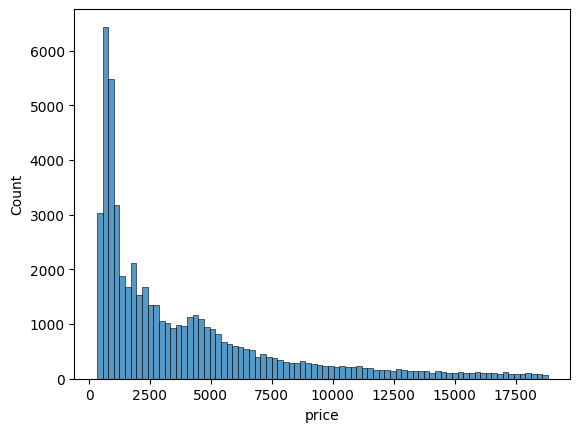

In [74]:
sns.histplot(data=diamond_data, x="price")

<Axes: >

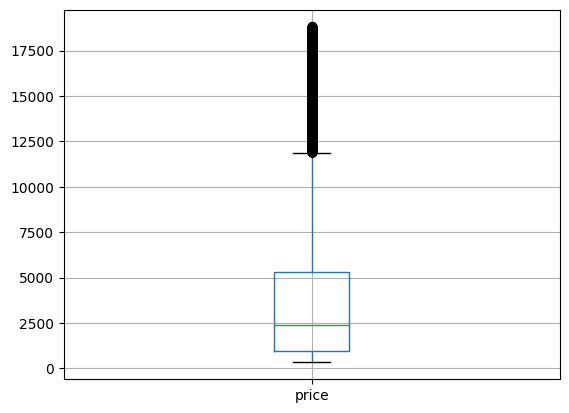

In [75]:
diamond_data.boxplot(column=['price'])

In [76]:
diamond_data['x'].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

<Axes: xlabel='x', ylabel='Count'>

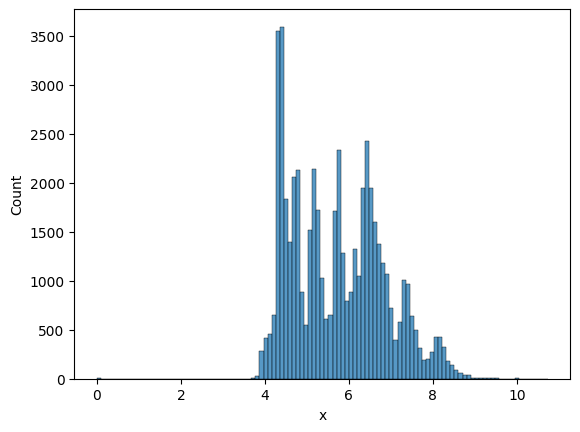

In [77]:
sns.histplot(data=diamond_data, x="x")

<Axes: >

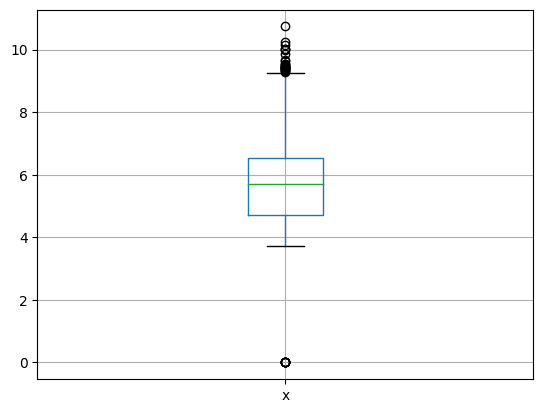

In [78]:
diamond_data.boxplot(column=['x'])

In [79]:
diamond_data['y'].describe()

count    53940.000000
mean         5.734526
std          1.142135
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

<Axes: xlabel='y', ylabel='Count'>

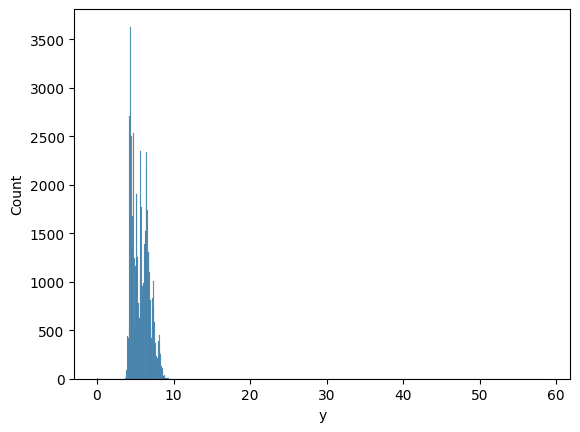

In [80]:
sns.histplot(data=diamond_data, x="y")

<Axes: >

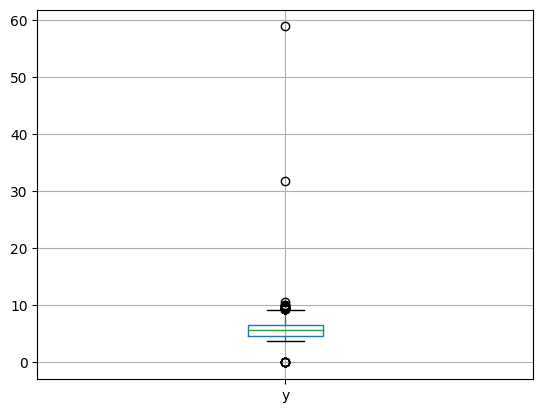

In [81]:
diamond_data.boxplot(column=['y'])

In [82]:
diamond_data['z'].describe()

count    53940.000000
mean         3.538734
std          0.705699
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: z, dtype: float64

<Axes: xlabel='z', ylabel='Count'>

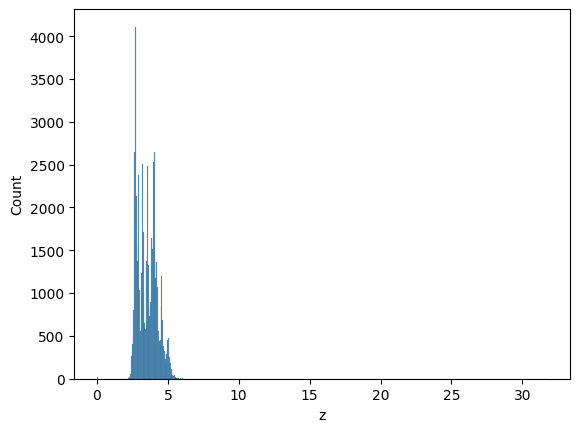

In [83]:
sns.histplot(data=diamond_data, x="z")

<Axes: >

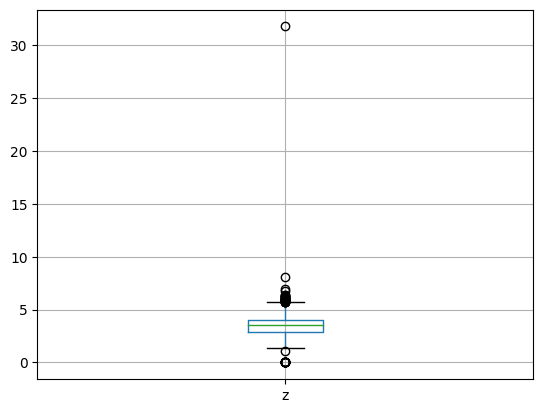

In [84]:
diamond_data.boxplot(column=['z'])

**Noted that there are rows that have a 0 for "x", "y", and "Z".**

In [85]:
diamond_data[diamond_data["x"] == 0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [86]:
diamond_data[diamond_data["y"] == 0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [87]:
diamond_data[diamond_data["z"] == 0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


**Dropped the columns where the x y & z data is missing**

In [88]:
diamond_data = diamond_data[diamond_data["x"] > 0]

In [89]:
diamond_data = diamond_data[diamond_data["y"] > 0]

In [90]:
diamond_data = diamond_data[diamond_data["z"] > 0]

In [91]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53920 non-null  int64  
 1   carat       53920 non-null  float64
 2   cut         53920 non-null  object 
 3   color       53920 non-null  object 
 4   clarity     53920 non-null  object 
 5   depth       53920 non-null  float64
 6   table       53920 non-null  float64
 7   price       53920 non-null  int64  
 8   x           53920 non-null  float64
 9   y           53920 non-null  float64
 10  z           53920 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


In [92]:
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Renamed first column which is currently unnamed to 'id'.**

In [93]:
diamond_data = diamond_data.rename(columns={"Unnamed: 0": "id"})

In [94]:
diamond_data.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Save the file.**

In [95]:
datapath = '/content/drive/MyDrive/Springboard/Capstone 3'
save_file(diamond_data, 'diamond_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "/content/drive/MyDrive/Springboard/Capstone 3/diamond_data.csv"


**Data Wrangling Summary**

Steps Performed:

1. I validated that the datatype of each column is accurate and does not need to be changed.

2. I checked whether any columns have NA values and determined that there are no columsn with NA values.

3. I checked all the numeric columns in the data to make sure that there are no errors. All the data looks valid.

4. I then filtered for all the object type data and checked the values for this data to make sure there are no invalid inputs. Noted that all data looks valid.

Missing Values:

I noted that for columns "x", "y", and "z", there are a few rows with a value of 0. Noted that this is an invalid value and since there were only 20 rows with a 0, decided to drop those rows.

Outliers:

I did not notice any major outliers in the data.